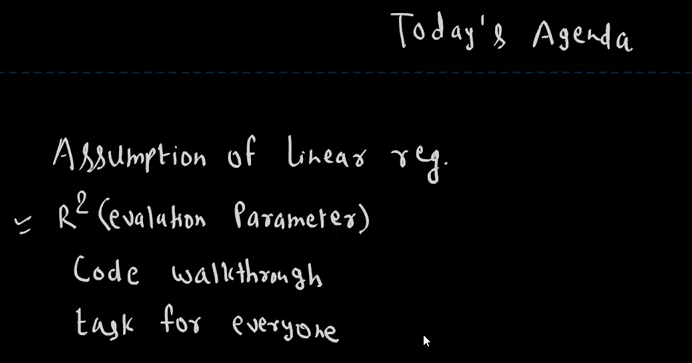

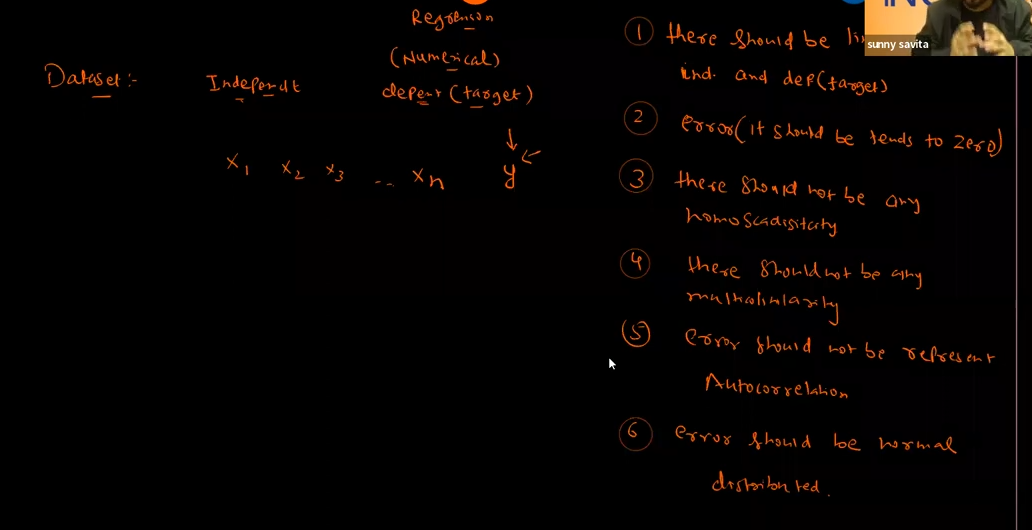

* error should be random (y-y^) and it should not show any patter in respect to the predicted value

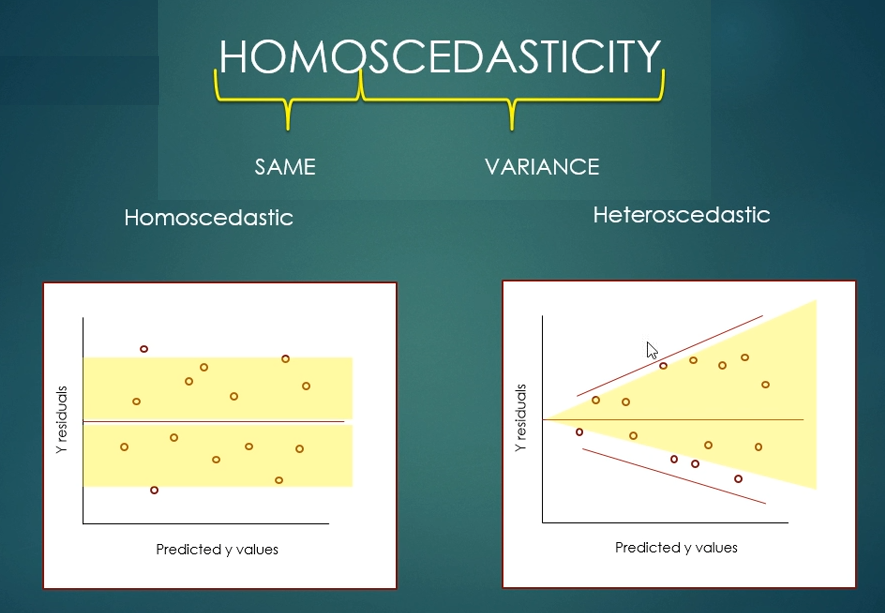

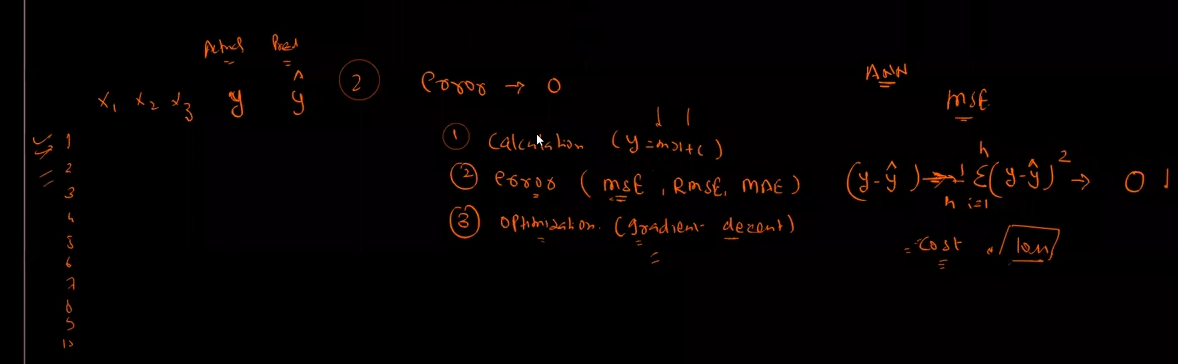

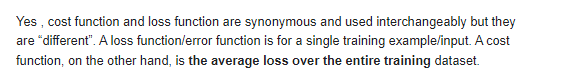

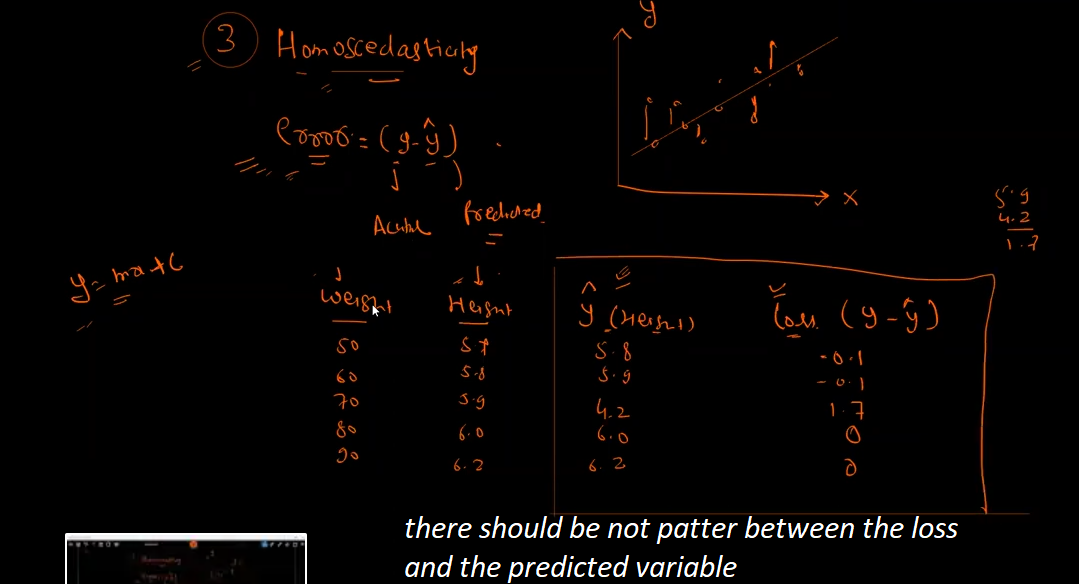

## What is Regression Analysis?
​
Regression in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand. Regression is used for time series modelling and finding the causal effect relationship between the variables and forecasting. For example, the relationship between the stock prices of the company and various factors like customer reputation and company annual performance etc. can be studied using regression.
​
​
Regression analysis is an important tool for analysing and modelling data. Here, we fit a curve/line to the data points, in such a manner that the differences between the distance of the actual data points from the plotted curve/line is minimum. The topic will be explained in detail in the coming sections.
​

## The use of Regression

Regression analyses the relationship between two or more features. Let’s take an example:

Let’s suppose we want to make an application which predicts the chances of admission a student to a foreign university. In that case, the 

The benefits of using Regression analysis are as follows:

   * It shows the significant relationships between the Lable (dependent variable) and the features(independent variable).
   * It shows the extent of the impact of multiple independent variables on the dependent variable.
   *  It can also measure these effects even if the variables are on a different scale.

These features enable the data scientists to find the best set of independent variables for predictions.

## Linear Regression

Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:
* Discreet/continuous independent variables
* A best-fit regression line
* Continuous dependent variable.
i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables.
The equation of the Linear Regression is:

                                                Y=a+b*X + e 

 Where,
 a is the intercept, 
b is the slope of the line, 
and e is the error term. 
The equation above is used to predict the value of the target variable based on the given predictor variable(s).

### The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [52]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matplotlib inline

In [53]:
data= pd.read_csv('D:\\lh_data\\ineuron\\Advertising.csv') # Reading the data file
data

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [55]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [56]:
data.isna().sum() # finding the count of missing values from different columns

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

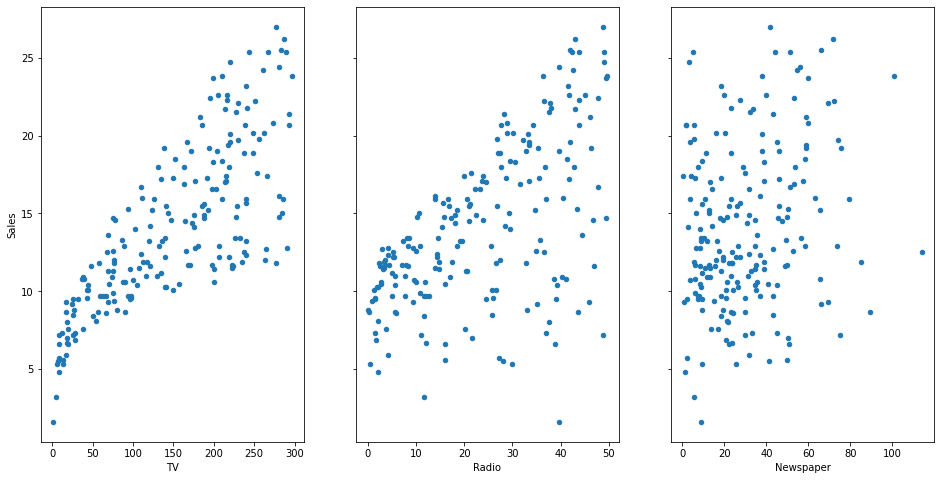

In [58]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions about the data

A generic question shall be: How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:
1. What’s the relationship between ads and sales?
2. How prominent is that relationship?
3. Which ad types contribute to sales?
4. How each ad contributes to sales?
5. Can sales be predicted based on the expense of the advertisement?

We will explore these questions below!


## Simple Linear Regression

Simple Linear regression is a method for predicting a **quantitative response** using a **single feature** ("input variable"). The mathematical equation is:

$y = \beta_0 + \beta_1x$

What do terms represent?
- $y$ is the response or the target variable
- $x$ is the feature
- $\beta_1$ is the coefficient of x
- $\beta_0$ is the intercept

$\beta_0$ and $\beta_1$ are the **model coefficients**. To create a model, we must "learn" the values of these coefficients. And once we have the value of these coefficients, we can use the model to predict the Sales!

### Estimating ("Learning") Model Coefficients

The coefficients are estimated using the **least-squares criterion**,  i.e., the best fit line has to be calculated that minimizes the **sum of squared residuals** (or "sum of squared errors").


### The mathematics involved
Take a quick look at the plot created. Now consider each point, and know that each of them has a coordinate in the form (X, Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distance between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

What elements are present in the diagram?
- The red points are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The green lines are the **residuals**, which is the distance between the observed values and the least squares line.


Before, we're labelling each green line as having a distance D, and each red point as having a coordinate of (X, Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$
These are called the normal equations for the least-squares line. There are further steps that can be taken in rearranging these equations to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here.

Let’s see the underlying assumptions: -
* The regression model is linear in terms of coefficients and error term.
* The mean of the residuals is zero.
* The error terms are not correlated with each other, i.e. given an error value; we cannot predict the next error value.
* The independent variables(x) are uncorrelated with the residual term, also termed as **exogeneity**. This, in layman term, generalises that in no way should the error term be predicted given the value of independent variables.
* The error terms have a constant variance, i.e. **homoscedasticity**.
* No Multicollinearity, i.e. no independent variables should be correlated with each other or affect one another. If there is multicollinearity, the precision of prediction by the OLS model decreases.
* The error terms are normally distributed.

The general equation of a straight line is:$$𝑦={mx+b}$$
It means that if we have the value of m and b, we can predict all the values of y for corresponding x.
During construction of a Linear Regression Model, the computer tries to calculate the values of m and b to get a straight line.
But the question is:
###### How Do you Know this is the best fit line?
The best fit line is obtained by minimizing the _residual_.
Residual is the distance between the actual Y and the predicted Y, as shown below:

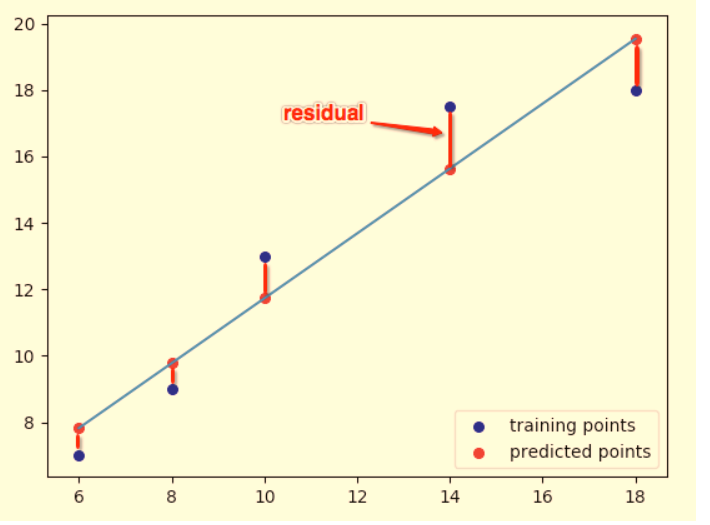

Mathematically, Residual is: $$r={y-(mx+b)}$$
Hence, the sum of the square of residuals is:

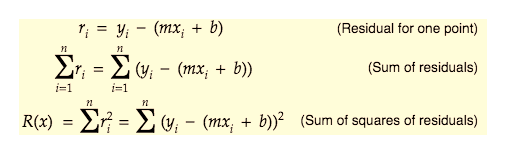

As we can see that the residual is both a function of m and b, so differentiating partially with respect to m and b will give us:

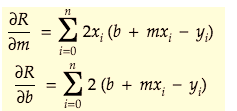

For getting the best fit line, residual should be minimum. The minima of a function occurs where the derivative=0. So, equating our corresponding derivatives to 0, we get:

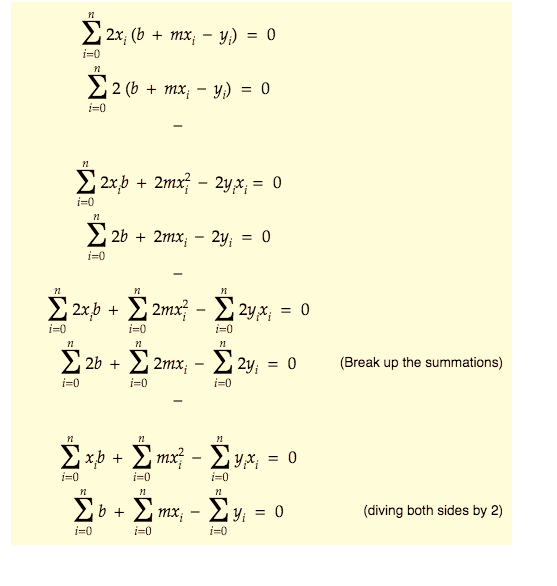

This same equation can be written in matrix form as:

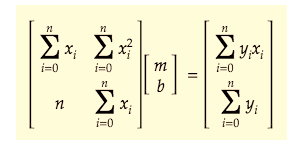

Ideally, if we'd have an equation of one dependent and one independent variable the minima will look as follows:
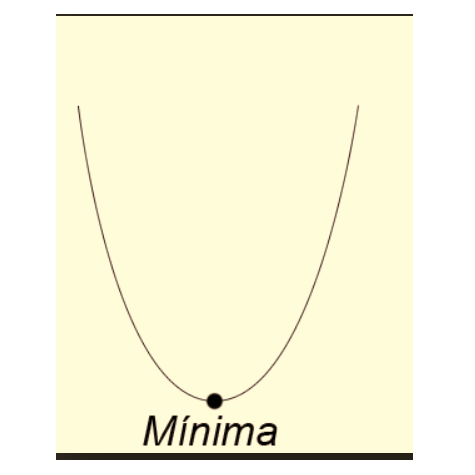

But as the residual's minima is dependent on two variables m and b, it becomes a _Paraboloid_ and the appropriate m and b are calculated using _*Gradient Descent*_ as shown below:

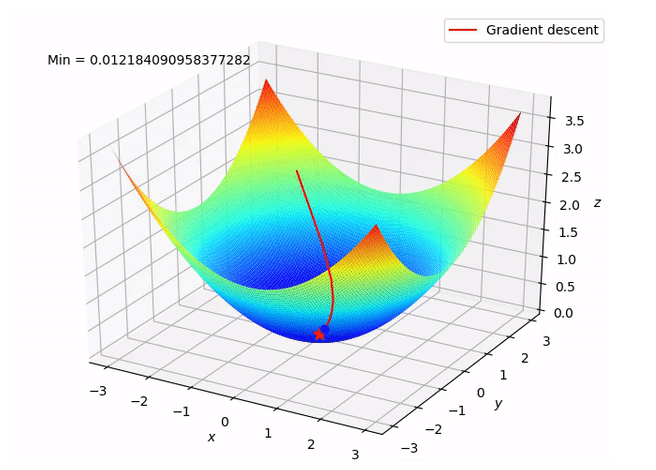

The new values for 'slope' and 'intercept' are caluclated as follows:

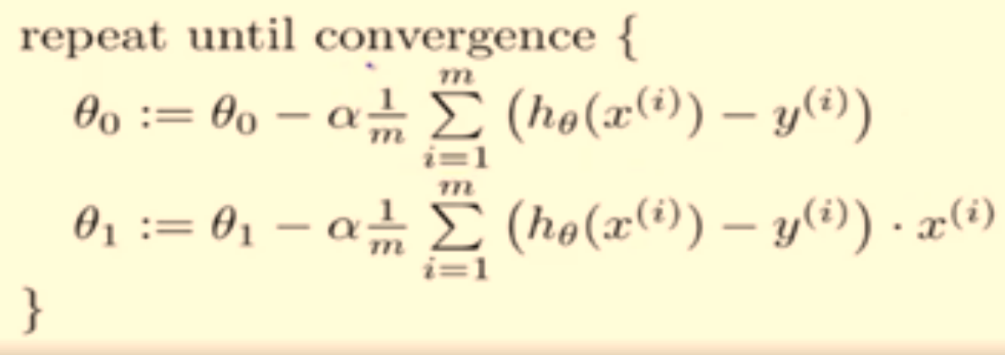

where, $\theta_0$ is 'intercept' , $\theta_1$ is the slope, $\alpha$ is the learning rate, m is the total number of observations and the term after the $\sum$ sign is the loss. Google Tensor board recommends a Learning rate between 0.00001 and 10. Generally a smaller learning rate is recommended to avoid overshooting while creating a model.
    

### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :

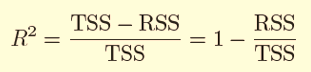
                                              
Where RSS:  is  the Residual Sum of squares and is given as :

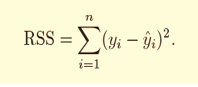
                                                                
RSS is the residual(error) term we have been talking about so far.
And, TSS:  is  the Total sum of squares and given as :

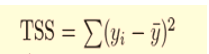
                                                             
TSS is calculated when we consider the line passing through the mean value of y, to be the best fit line.
Just like RSS, we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.

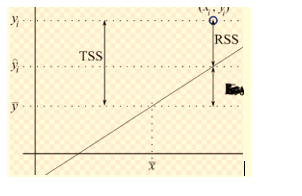
    
The closer the value of R2 is to 1 the better the model fits our data. If R2 comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.

### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.
Let’s understand this with an example:
 
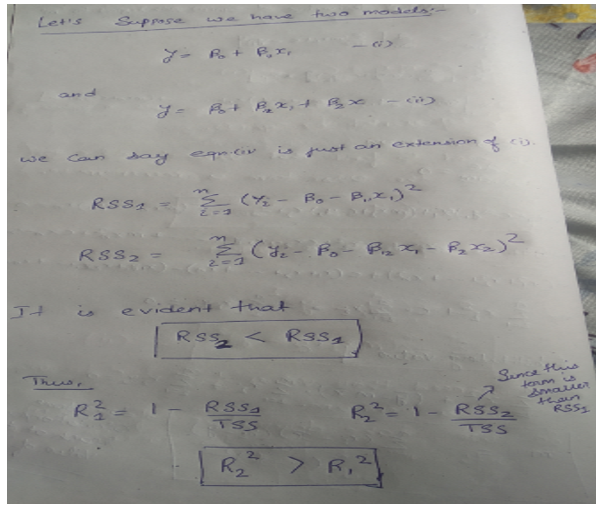

We can see that R2 always increases with an increase in the number of independent variables.
Thus, it doesn’t give a better picture and so we need Adjusted R2 value to keep this in check.
Mathematically, it is calculated as:

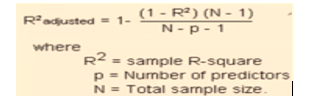
                                        
In the equation above, when p = 0, we can see that adjusted R2 becomes equal to R2.
Thus, adjusted R2  will always be less than or equal to R2, and it penalises the excess of independent variables which do not affect the dependent variable.

In [62]:
# create X and y
X = data[['TV']]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(f"intercept: {lm.intercept_}")
print(f"coeff: {lm.coef_}")

intercept: 7.032593549127695
coeff: [0.04753664]


### Interpreting the model

How do we interpret the coefficient for spends on TV ad ($\beta_1$)?
- A "unit" increase in spends on a TV ad is **associated with** a 0.047537 "unit" increase in Sales.
- Or, an additional $1,000  on TV ads is **translated to** an increase in sales by 47.53 Dollars.

As an increase in TV ad expenditure is associated with a **decrease** in sales, $\beta_1$ would be **negative**.


## Prediction  using the model

If the expense on TV ad is $50000, what will be the sales prediction for that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$


In [64]:
#calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Let's do the same thing using code.

In [66]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

TV
0  50

In [67]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

### Plotting the Least Squares Line

In [68]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

TV
0    0.7
1  296.4

In [69]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

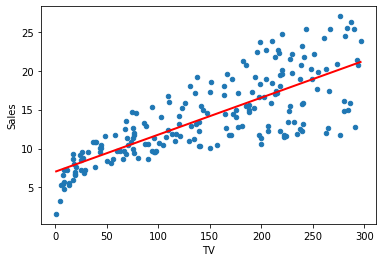

In [71]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Model Confidence

**Question:** Is linear regression a low bias/high variance model or a high bias/low variance model?

**Answer:** It's a High bias/low variance model. Even after repeated sampling, the best fit line will stay roughly in the same position (low variance), but the average of the models created after repeated sampling won't do a great job in capturing the perfect relationship (high bias). Low variance is helpful when we don't have less training data! 

If the model has calculated a 95% confidence for our model coefficients, it can be interpreted as follows: 
If the population from which this sample is drawn, is **sampled 100 times**, then approximately **95 (out of 100) of those confidence intervals** shall contain the "true" coefficients.

In [73]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way actually to know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.


### Hypothesis Testing and p-values

**Hypothesis testing** is Closely related to confidence intervals. We start with a **null hypothesis** and an **alternate hypothesis** (that is opposite to the null). Then, we check whether the data **rejects the null hypothesis** or **fails to reject the null hypothesis**.

("Failing to reject" the null hypothesis does not mean "accepting" the null hypothesis. The alternative hypothesis might indeed be true, but that we just don't have enough data to prove that.)

The conventional hypothesis test is as follows:
- **Null hypothesis:** No relationship exists between TV advertisements and Sales (and hence $\beta_1$ equals zero).
- **Alternative hypothesis:** There exists a relationship between TV advertisements and Sales (and hence, $\beta_1$ is not equal to zero).

How do we test this? We reject the null hypothesis (and thus believe the alternative hypothesis) if the 95% confidence interval **does not include zero**. The **p-value** represents the probability of the coefficient actually being zero.

In [74]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. 

Thus, a p-value of less than 0.05 is a way to decide whether there is any relationship between the feature in consideration and the response or not. Using 0.05 as the cutoff is just a convention.

In this case, the p-value for TV ads is way less than 0.05, and so we **believe** that there is a relationship between TV advertisements and Sales.

Note that we generally ignore the p-value for the intercept.

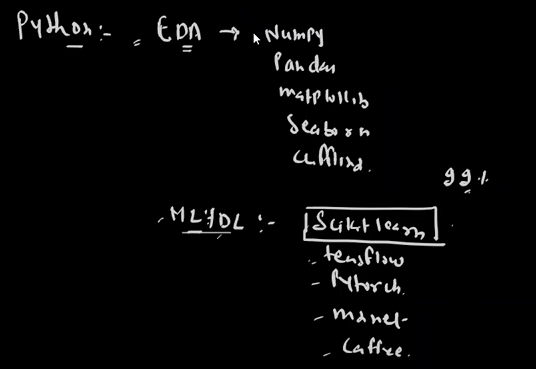

In [4]:
#!pip install pandas-profiling --user

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
%matplotlib inline

In [6]:
df = pd.read_csv("D:\\lh_data\\ineuron\\Advertising.csv")
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [7]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
pf.to_file("test.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
# selecting one feature
x = df[["TV"]]   # linear regression expects a 2D array
x

TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]

In [25]:
y = df.Sales
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
# import linear regression library
from sklearn.linear_model import LinearRegression

In [28]:
print(x.shape, y.shape)

(200, 1) (200,)


In [29]:
linear=LinearRegression()  #
linear.fit(x,y)   # e

LinearRegression()

In [30]:
linear.intercept_

7.032593549127695

In [31]:
linear.coef_

array([0.04753664])

In [41]:
file = "linear1_reg.sav"              # filename
pickle.dump(linear,open(file,"wb") )   # dump the linear instance into a binary file
# note you can use OLS(statmodels) to get summaries but you can not save the file, for that case you need the sklearn

In [38]:
linear.predict([[94]])

array([11.50103775])

In [35]:
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

## R^2

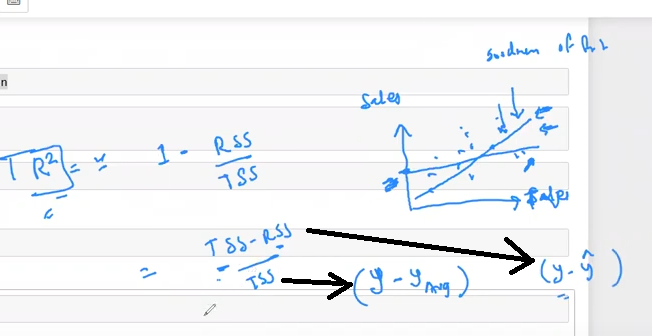

### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :

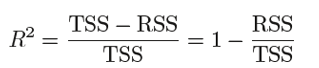
                                              
Where RSS:  is  the Residual Sum of squares and is given as :

<img src="RSS.PNG">
                                                                
RSS is the residual(error) term we have been talking about so far.
And, TSS:  is  the Total sum of squares and given as :

<img src="TSS.PNG">
                                                             
TSS is calculated when we consider the line passing through the mean value of y, to be the best fit line.
Just like RSS, we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.

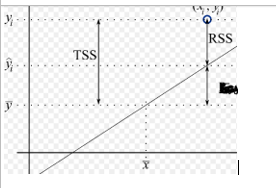
    
The closer the value of $R^2$ is to 1 the better the model fits our data. If $R^2$ comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.


### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the $R^2$ increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but $R^2$ value will increase. To rectify this problem, we use Adjusted $R^2$ value which penalises excessive use of such features which do not correlate with the output data.
Let’s understand this with an example:
<img src="adjr.PNG" width="300">

We can see that $R^2$ always increases with an increase in the number of independent variables.
Thus, it doesn’t give a better picture and so we need Adjusted $R^2$ value to keep this in check.
Mathematically, it is calculated as:

 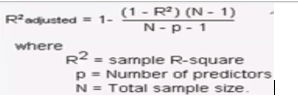
In the equation above, when p = 0, we can see that adjusted $R^2$ becomes equal to $R^2$.
Thus, adjusted $R^2$  will always be less than or equal to $R^2$, and it penalises the excess of independent variables which do not affect the dependent variable.


# example

In [40]:
l=[4,5,6,7,89,34,45,67,23]
for i in l:
    print(f"i:{i}, Prediction:{linear.predict([[i]])}")

i:4, Prediction:[7.22274011]
i:5, Prediction:[7.27027675]
i:6, Prediction:[7.31781339]
i:7, Prediction:[7.36535003]
i:89, Prediction:[11.26335455]
i:34, Prediction:[8.64883932]
i:45, Prediction:[9.17174237]
i:67, Prediction:[10.21754846]
i:23, Prediction:[8.12593628]


# OLS ORDINAR LEASE SQUARE - LIBRARY FROM STATSMODELS

In [44]:
import statsmodels.formula.api as smf

In [45]:
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [47]:
lm = smf.ols(formula="Sales ~ TV ", data=df).fit()
print(lm.conf_int())
lm.summary()

                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        20:54:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
lm2 = smf.ols(formula="Sales ~ TV + Newspaper ", data=df).fit()
print(lm2.conf_int())
lm2.summary()

                  0         1
Intercept  4.738940  6.810956
TV         0.041812  0.051991
Newspaper  0.024155  0.064284


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           3.95e-45
Time:                        20:57:26   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lm3 = smf.ols(formula="Sales ~ TV + Radio + Newspaper ", data=df).fit()
print(lm3.conf_int())
lm3.summary()

                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        20:58:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multi- Collinearity

**Origin of the word:** The word multi-collinearity consists of two words:Multi, meaning multiple, and Collinear, meaning being linearly dependent on each other. 

For e.g.,
		Let’s consider this equation
		$ a+b=1  => b=1-a $
        
It means that ‘b’ can be represented in terms of ‘a’ i.e., if the value of ‘a’ 		changes, automatically the value of ‘b’ will also change. This equation 		denotes a simple linear relationship among two variables.

**Definition:** The purpose of executing a Linear Regression is to predict the value of a 	dependent variable based on certain independent variables.

So, when we perform a Linear Regression, we want our dataset to have variables which are independent i.e., we should not be able to define an 	independent variable with the help of another independent variable  	because now in our model we have two variables which can be defined based 	on a certain set of independent variables which defeats the entire purpose.

* Multi-collinearity is the statistical term to represent this type of a relation amongst the independent variable- when the independent variables are not so independent😊.
* We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

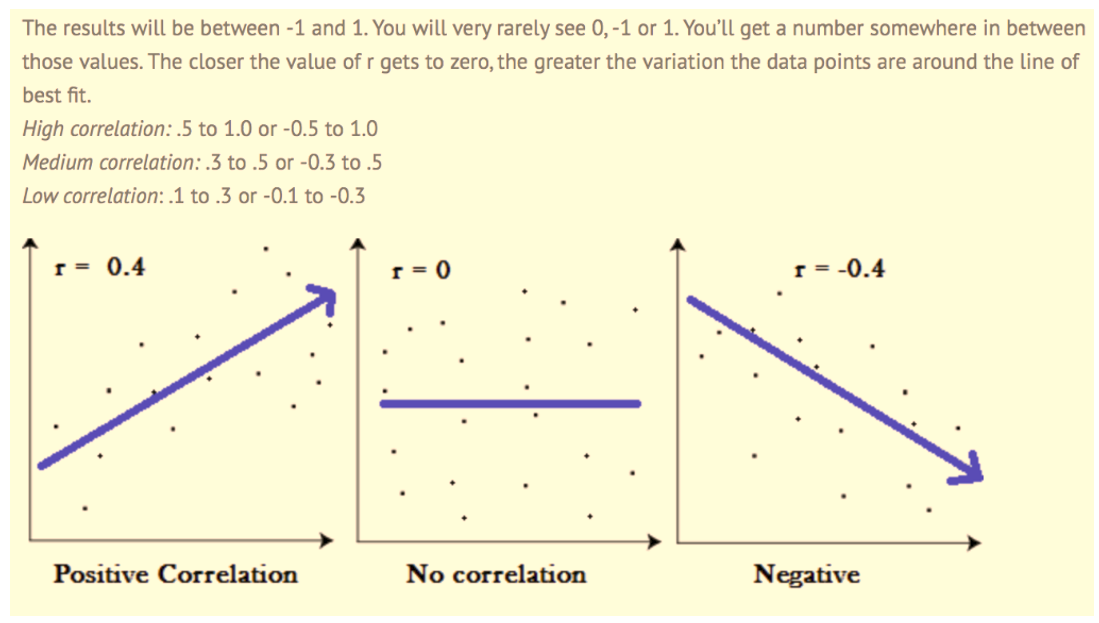

The mathematical flow for multicollinearity can be shown as:
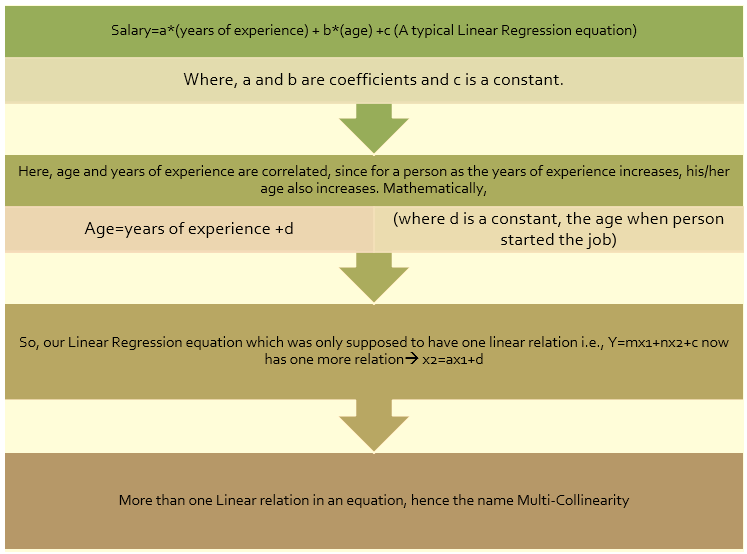

#### Why Should We Care About Multi-Collinearity?
* The coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.
* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.
* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets. 
* Can result in a Dummy Variable Trap.

##### Detection
* __Correlation Matrices and Plots:__ for correlation between all the X variables.
        
        This plot shows the extent of correlation between the independent variable. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.
 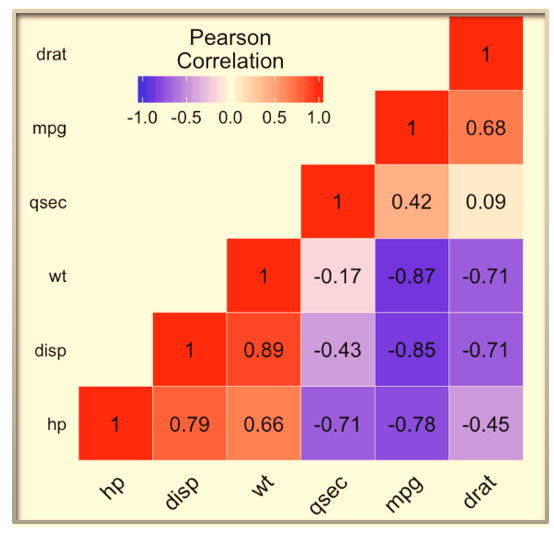
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

     VIF=$\frac {1}{(1-R squared)}$

            The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.

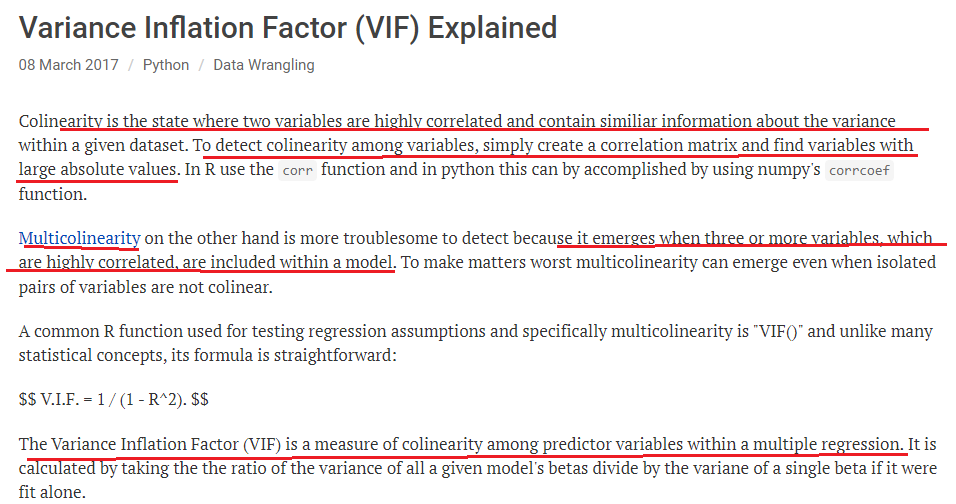

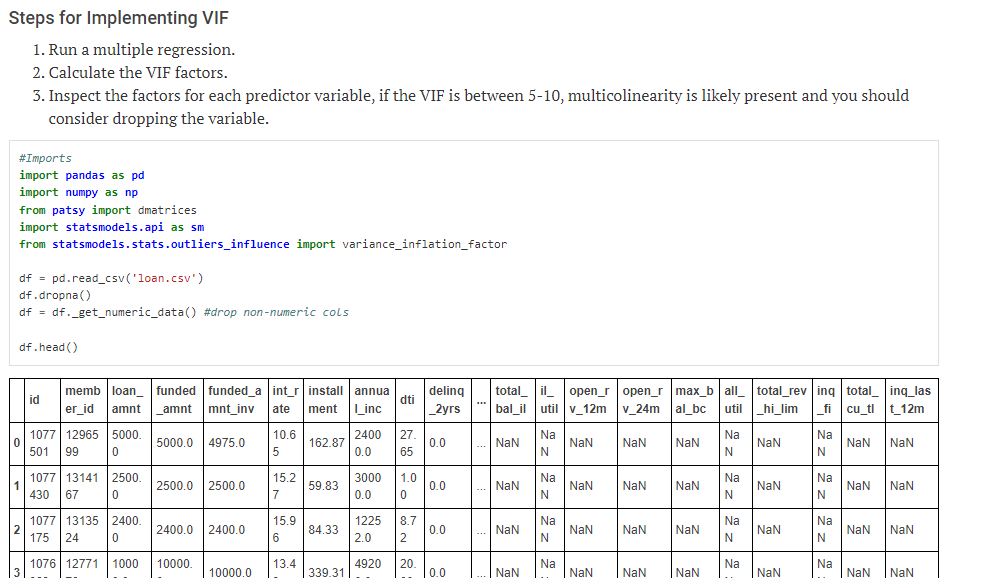

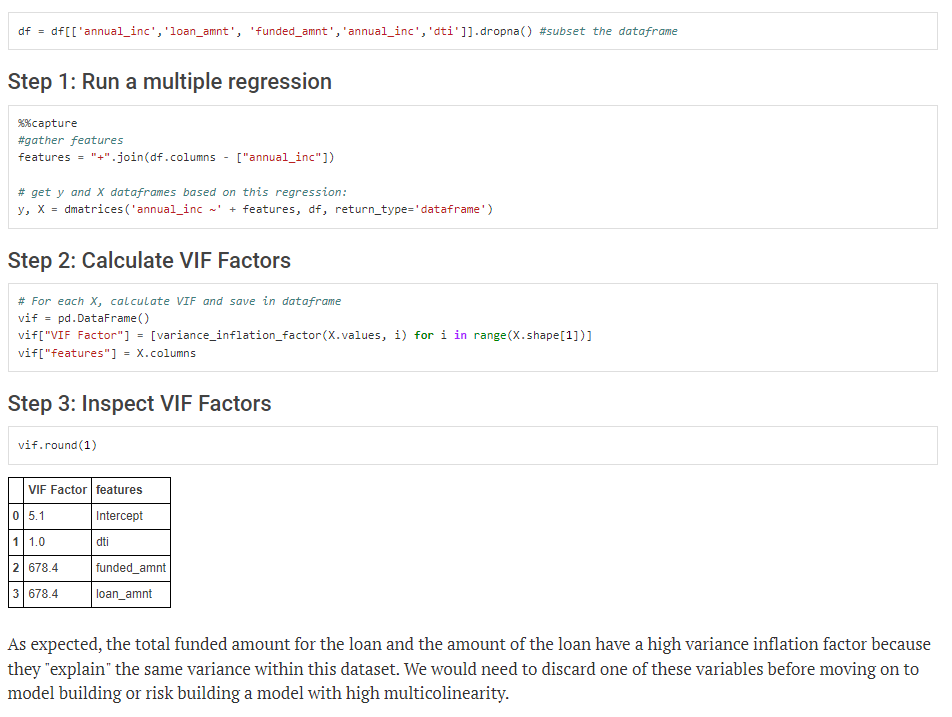

#### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* Principal Component Analysis

# NOTE:
the idea of variance inflation factor is i take one colum in one iteration as my target variable and the remaining columns as my feature variables. i fit a linear regression model on it.
Calculate the R2 value and i take the inverse of one minues the R2 value and i calcualte the VIF

* https://www.youtube.com/watch?v=qmt7ZZoiDwc

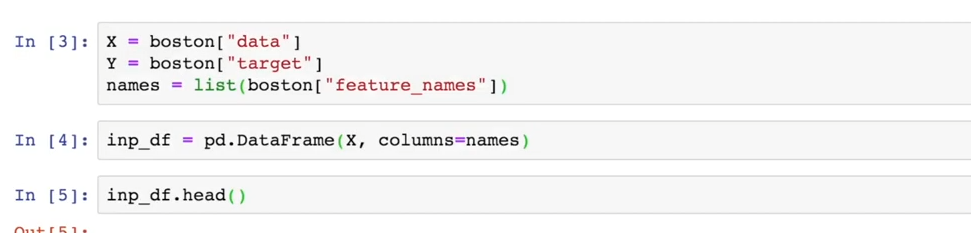

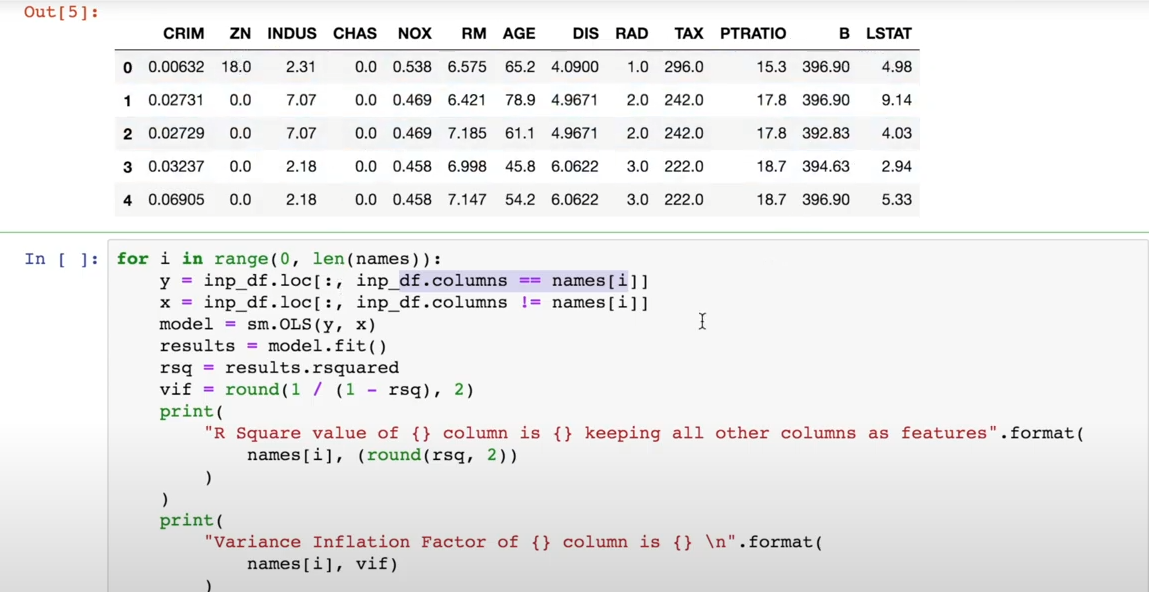